<a href="https://colab.research.google.com/github/crhx/Dataengy/blob/main/Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

#read in data
crash_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crash-data-ohwy.csv')


In [38]:
import matplotlib.pyplot as plt

#existence assertions. Every crash ID has a vehicle
vehicles = crash_data[crash_data['Vehicle ID'].notnull()]
crash_id = crash_data['Crash ID'].unique()

for id in crash_id:
  exists = vehicles[crash_data['Crash ID'] == id]
  if len(exists) == 0:
      print(f'Crash {id} has no vehicle')

#limit assertions. Every crash has a participant
participants = crash_data[crash_data['Participant ID'].notnull()]

for id in crash_id:
  exists = participants[crash_data['Crash ID'] == id]
  if len(exists) == 0:
    print(f'Crash {id} has no participants')

#intra-record assertions. Every crash id has an unique Linear Reference System's number
LRS = crash_data[crash_data['Linear Reference System (LRS)'].notnull()]

for id in crash_id:
  exists = LRS[crash_data['Crash ID'] == id]
  if len(exists) == 0:
    print(f'Crash {id} has no Linear Reference System number')

#inter-record check assertions. Every crash has a Highway Number

highway_num = crash_data[crash_data['Highway Number'].notnull()]

for id in crash_id:
  exists = highway_num[crash_data['Crash ID'] == id]
  if len(exists) == 0:
    print(f'Crash {id} has no highway number')


#summary assertions. Amount of crashes exceeds ten thousand
count = 0
for id in crash_id:
  count += 1
if count > 1000:
  print(f'There were {count} crashes in the data')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


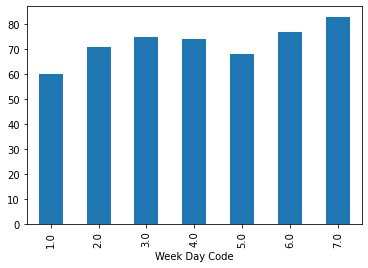

In [47]:

#statistical distribution assertions.2

days = crash_data['Week Day Code'].notnull()

for day in days:
  if day > 1000:
    print(f'The {day} exceeds the statistical assertion')
  
crash_data.groupby(['Week Day Code']).count()['Crash ID'].plot.bar()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Day,Crash Year,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
Crash Month,,,,,,,,,,,,,,,,,,,,,
1.0,56,56,0,0,0,0,0,56,56,56,...,0,0,0,0,0,0,0,0,0,0
2.0,46,46,0,0,0,0,0,46,46,46,...,0,0,0,0,0,0,0,0,0,0
3.0,57,57,0,0,0,0,0,57,57,57,...,0,0,0,0,0,0,0,0,0,0
4.0,53,53,0,0,0,0,0,53,53,53,...,0,0,0,0,0,0,0,0,0,0
5.0,41,41,0,0,0,0,0,41,41,41,...,0,0,0,0,0,0,0,0,0,0
6.0,36,36,0,0,0,0,0,36,36,36,...,0,0,0,0,0,0,0,0,0,0
7.0,37,37,0,0,0,0,0,37,37,37,...,0,0,0,0,0,0,0,0,0,0
8.0,33,33,0,0,0,0,0,33,33,33,...,0,0,0,0,0,0,0,0,0,0
9.0,34,34,0,0,0,0,0,34,34,34,...,0,0,0,0,0,0,0,0,0,0


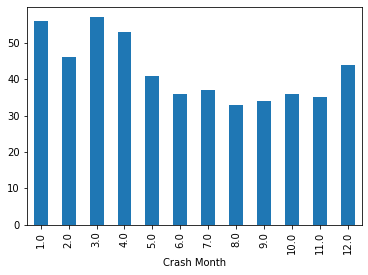

In [25]:
crash_data.groupby(['Crash Month']).count()['Crash ID'].plot.bar()
crash_data.groupby(['Crash Month']).count()

In [22]:
crash_data.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
0,1809119,1,NaN,NaN,NaN,NaN,NaN,99992.0,3.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN


In [23]:
vehicles.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
1,1809119,2,3409578.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,1809119,2,3409579.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
6,1809229,2,3409765.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
participants.head()

,Crash ID,Record Type,Vehicle ID,Participant ID,Participant Display Seq#,Vehicle Coded Seq#,Participant Vehicle Seq#,Serial #,Crash Month,Crash Day,...,Participant Cause 2 Code,Participant Cause 3 Code,Participant Event 1 Code,Participant Event 2 Code,Participant Event 3 Code,BAC Test Results Code,Alcohol Use Reported,Drug Use Reported,Participant Marijuana Use Reported,Participant Striker Flag
2,1809119,3,3409578.0,3887884.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,1809119,3,3409579.0,3887885.0,2.0,2.0,1.0,NaN,NaN,NaN,...,NaN,NaN,9.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN
7,1809229,3,3409765.0,3888073.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,1809229,3,0.0,3888074.0,2.0,NaN,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
11,1809637,3,3410470.0,3888766.0,1.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
